In [36]:
%run ../../algorithmeX.ipynb

## [Polyabolos](https://fr.wikipedia.org/wiki/Polyabolo)

Comme lors de l'étude des [polyominos](../puzzles-carres/puzzles-carres.ipynb), on considère,
pour $i,j\in\mathbf Z$, le *carré* $(i,j)$ de côtés $1$ parallèles aux axes et centré en  $(i,j)$.

En découpant ce carré selon une de ses diagonales, on met en évidence 4 triangles rectangles isocèles
⬕, ◩, ⬔ et  ◪ que l'on appellera *triangle* $(i,j,k)$ où $k=0,1,2$ et $3$
respectivement. Un polyabolo est ainsi une réunion de triangles $(i,j,k)$ qui ne se chevauchent pas ($(i,j,k)$ et $(i,j,k\pm1$ mod $4)$ se chevauchent)

Les principes sont les mêmes que pour les [polyominos](../puzzles-carres/puzzles-carres.ipynb).

In [37]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['toolbar'] = 'None'
import random

snsSet3Set2Colors = [(0.5529411764705883, 0.8274509803921568, 0.7803921568627451), (1.0, 1.0, 0.7019607843137254), (0.7450980392156863, 0.7294117647058823, 0.8549019607843137), (0.984313725490196, 0.5019607843137255, 0.4470588235294118), (0.5019607843137255, 0.6941176470588235, 0.8274509803921568), (0.9921568627450981, 0.7058823529411765, 0.3843137254901961), (0.7019607843137254, 0.8705882352941177, 0.4117647058823529), (0.9882352941176471, 0.803921568627451, 0.8980392156862745), (0.8509803921568627, 0.8509803921568627, 0.8509803921568627), (0.7372549019607844, 0.5019607843137255, 0.7411764705882353), (0.8, 0.9215686274509803, 0.7725490196078432), (1.0, 0.9294117647058824, 0.43529411764705883), (0.4, 0.7607843137254902, 0.6470588235294118), (0.9882352941176471, 0.5529411764705883, 0.3843137254901961), (0.5529411764705883, 0.6274509803921569, 0.796078431372549), (0.9058823529411765, 0.5411764705882353, 0.7647058823529411), (0.6509803921568628, 0.8470588235294118, 0.32941176470588235), (1.0, 0.8509803921568627, 0.1843137254901961), (0.8980392156862745, 0.7686274509803922, 0.5803921568627451), (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]
snsPastelColors = [(0.984313725490196, 0.7058823529411765, 0.6823529411764706), (0.7019607843137254, 0.803921568627451, 0.8901960784313725), (0.8, 0.9215686274509803, 0.7725490196078432), (0.8705882352941177, 0.796078431372549, 0.8941176470588236), (0.996078431372549, 0.8509803921568627, 0.6509803921568628), (1.0, 1.0, 0.8), (0.8980392156862745, 0.8470588235294118, 0.7411764705882353), (0.9921568627450981, 0.8549019607843137, 0.9254901960784314), (0.9490196078431372, 0.9490196078431372, 0.9490196078431372), (0.7019607843137254, 0.8862745098039215, 0.803921568627451), (0.9921568627450981, 0.803921568627451, 0.6745098039215687), (0.796078431372549, 0.8352941176470589, 0.9098039215686274), (0.9568627450980393, 0.792156862745098, 0.8941176470588236), (0.9019607843137255, 0.9607843137254902, 0.788235294117647), (1.0, 0.9490196078431372, 0.6823529411764706), (0.9450980392156862, 0.8862745098039215, 0.8), (0.8, 0.8, 0.8)]
snsTab20Colors = [(0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.6823529411764706, 0.7803921568627451, 0.9098039215686274), (1.0, 0.4980392156862745, 0.054901960784313725), (1.0, 0.7333333333333333, 0.47058823529411764), (0.17254901960784313, 0.6274509803921569, 0.17254901960784313), (0.596078431372549, 0.8745098039215686, 0.5411764705882353), (0.8392156862745098, 0.15294117647058825, 0.1568627450980392), (1.0, 0.596078431372549, 0.5882352941176471), (0.5803921568627451, 0.403921568627451, 0.7411764705882353), (0.7725490196078432, 0.6901960784313725, 0.8352941176470589), (0.5490196078431373, 0.33725490196078434, 0.29411764705882354), (0.7686274509803922, 0.611764705882353, 0.5803921568627451), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902), (0.9686274509803922, 0.7137254901960784, 0.8235294117647058), (0.4980392156862745, 0.4980392156862745, 0.4980392156862745), (0.7803921568627451, 0.7803921568627451, 0.7803921568627451), (0.7372549019607844, 0.7411764705882353, 0.13333333333333333), (0.8588235294117647, 0.8588235294117647, 0.5529411764705883), (0.09019607843137255, 0.7450980392156863, 0.8117647058823529), (0.6196078431372549, 0.8549019607843137, 0.8980392156862745)]

palette = snsPastelColors

def randomColor(seed = None):
    if seed is not None:
        random.seed(str(seed))
    return random.choice(palette)

In [38]:
class PIECE:

    # une piece est un ensemble (frozenset) de triplets (i,j,k), k = 0, 1, 2, 3
    def __init__(self,nom,piece,couleur = None):
        self.nom = nom
        self.piece = PIECE.normalise(piece)
        self.largeur = max(t[0] for t in self.piece) + 1
        self.hauteur = max(t[1] for t in self.piece) + 1
        self.couleur = couleur
      

    def __hash__(self):
        return hash(self.piece)

    def __eq__(self,q):
        return self.piece == q.piece

    def __str__(self):
        return str((self.nom,self.piece))

    def normalise(piece):
        min_i = min(t[0] for t in piece)
        min_j = min(t[1] for t in piece)
        p = set()
        for i,j,k in piece:
            if k == 0 and (i,j,2) in piece:
                p |= {(i,j,1),(i,j,3)}
            elif (k == 2 and (i,j,0) not in piece) or k != 2:
                p.add((i,j,k))
        return frozenset((i - min_i, j - min_j, k) for i, j, k in p)

    def transposee(self):
        return PIECE(self.nom, frozenset((- i, j, [3,2,1,0][k]) for i, j, k in self.piece))

    def rotation(self):
        return PIECE(self.nom, frozenset((-j, i, (k - 1) % 4) for i, j, k in self.piece))

    def isometriquesPlus(self):
        l = [self]
        for _ in range(3):
            p = l[-1].rotation()
            l.append(p)
        return list(set(l))
    
    def isometriques(self):
        l1 = self.isometriquesPlus()
        l2 = self.transposee().isometriquesPlus()
        return(list(set(l1 + l2)))

    def triangle(k):
         triangles = [((-.5, .5, -.5), (-.5, -.5, .5)),
                      ((-.5, -.5, .5), (.5, -.5, .5)),
                      ((.5, -.5, .5), (.5, .5, -.5)),
                      ((.5, -.5, .5), (-.5, -.5, .5))
                 ]
         return triangles[k]
         
    def plotTriangle(ax, i, j, k, **kwargs):
        X, Y = PIECE.triangle(k)
        ax.fill(list(map(lambda u: i + u, X)), list(map(lambda v: j + v, Y)), **kwargs)

    def polygoneOfTriplets(e):
        """e est un ensemble de triplets d'entiers (i,j,k)
        representant une piece non nécessairement normalisée.
        Renvoie une liste de deux tuples pour le dessin de la piece.
        """
        segments = set()
        for i,j,k in e:
            if k == 0:
                if (i, j, 2) not in e: segments.add(((i - .5, i + .5),(j + .5, j - .5)))
                if (i, j - 1, 1) not in e and (i, j - 1, 2) not in e: segments.add(((i - .5, i + .5),(j - .5, j - .5)))
                if (i - 1, j, 2) not in e and (i - 1, j, 3) not in e: segments.add(((i - .5, i - .5),(j - .5, j + .5)))
            elif k == 1:
                if (i, j, 3) not in e: segments.add(((i - .5, i + .5),(j - .5, j + .5)))
                if (i, j + 1, 0) not in e and (i, j + 1, 3) not in e: segments.add(((i - .5, i + .5),(j + .5, j + .5)))
                if (i - 1, j, 2) not in e and (i - 1, j, 3) not in e: segments.add(((i - .5, i - .5),(j - .5, j + .5)))
            elif k == 2:
                if (i, j, 0) not in e: segments.add(((i - .5, i + .5),(j + .5, j - .5)))
                if (i, j + 1, 0) not in e and (i, j + 1, 3) not in e: segments.add(((i - .5, i + .5),(j + .5, j + .5)))
                if (i + 1, j, 0) not in e and (i + 1, j, 1) not in e: segments.add(((i + .5, i + .5),(j - .5, j + .5)))
            else:
                if (i, j, 1) not in e: segments.add(((i - .5, i + .5),(j - .5, j + .5)))
                if (i, j - 1, 1) not in e and (i, j - 1, 2) not in e: segments.add(((i - .5, i + .5),(j - .5, j - .5)))
                if (i + 1, j, 0) not in e and (i + 1, j, 1) not in e: segments.add(((i + .5, i + .5),(j - .5, j + .5)))
        return segments
    
    def plotPolyabolo(ax, e, couleur, w):
        for s in PIECE.polygoneOfTriplets(e):
            ax.plot(*s, linewidth = .75, color = 'black')
        for i, j, k in e:
            PIECE.plotTriangle(ax, i, j, k,  facecolor = couleur, edgecolor='black', linewidth=w)
        
    def plot(self):
        
        fig = plt.figure(facecolor='w')
        fig.set_figheight(self.hauteur)
        ax = fig.add_subplot(111)
        ax.axis('off')
        ax.axis('equal')
        ax.set_title(self.nom)
        c = 'white' if self.couleur is None else self.couleur
        PIECE.plotPolyabolo(ax, self.piece, c, .05)

#### Génération des polyabolos de taille donnée
$N=8$

On calcule une liste $\texttt{polyabolos}$ telle que, pour $1\leqslant n\leqslant N$, $\texttt{polyabolos[}n\texttt{]}=$ la liste des polyabolos de taille $n$.

   1 1-abolos
   3 2-abolos
   4 3-abolos
  14 4-abolos
  30 5-abolos
 107 6-abolos
 318 7-abolos
1116 8-abolos


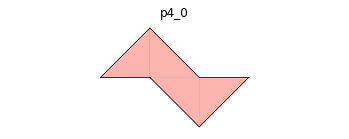

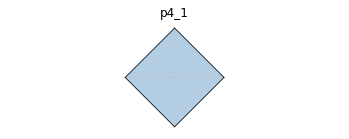

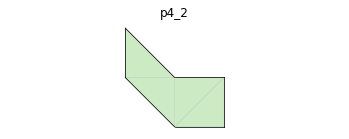

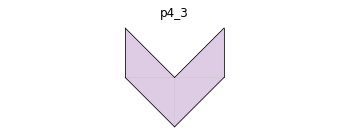

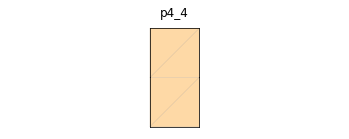

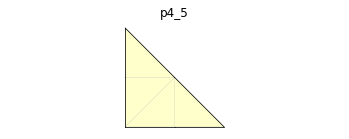

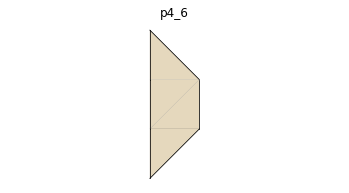

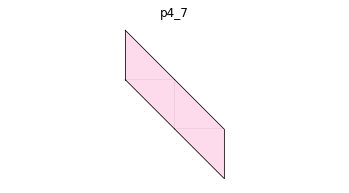

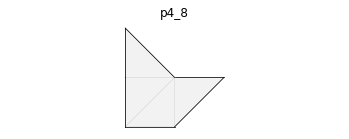

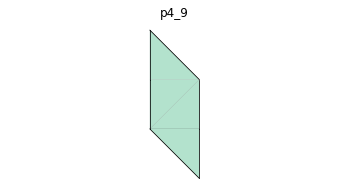

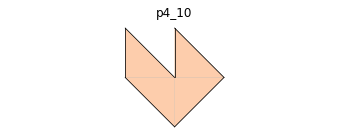

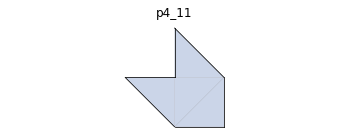

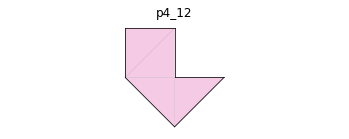

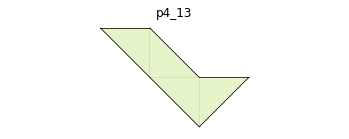

In [46]:
N = 8

def genPolys(p):
    """
    p est l'ensemble des x.piece quand x parcourt l'ensembles des polyabolos de taille n
    genPolys(p) renvoie  l'ensemble des x.piece quand x parcourt l'ensembles des polyabolos de taille n + 1
    """
    q = set()
    def add(piece0,t):
        Piece = PIECE('', piece0 | frozenset([t]))
        if q.isdisjoint(Piece.isometriques()):
            q.add(Piece)
    for piece0 in p:
        for i0,j0,k0 in piece0:
            t = (i0,j0,[2,3,0,1][k0]) 
            if t not in piece0:
                add(piece0,t)
            t1, t2 = ((i0,j0+1,0),(i0,j0+1,3)) if k0 in[1,2] else ((i0,j0-1,1),(i0,j0-1,2))
            if all([(t1[0],t1[1],k) not in piece0 for k in range(4)]):
                add(piece0,t1)
                add(piece0,t2)
            t1, t2 = ((i0+1,j0,0),(i0+1,j0,1)) if k0 in[2,3] else ((i0-1,j0,2),(i0-1,j0,3))
            if all([(t1[0],t1[1],k) not in piece0 for k in range(4)]):
                add(piece0,t1)
                add(piece0,t2)
    return {x.piece for x in q}

_p = [set(),{frozenset([(0,0,0)])}]
for n in range(N - 1): 
    _p.append(genPolys(_p[-1]))
    
polyabolos = [[PIECE(f'p{i}_{j}', piece, couleur=palette[j%(len(palette))]) 
                for j, piece in enumerate(sorted(list(e),key = hash))]
                for i, e in enumerate(_p)]

for e in polyabolos: 
    for p in e: globals()[p.nom] = p    

for n in range(1,N+1):
    print(f'{len(polyabolos[n]):>4} {n}-abolos')

# Exemple, les 14 tetrabolos
# Noter que, par ex., p4_3 == polyabolos[4][3]
for p in polyabolos[4]: p.plot()


Pour pouvoir appliquer l'algorithme X à la résolution de puzzles de polyabolos, 
on découpe chaque carré $(i,j)$ en 4 petits triangles disjoints, ⛝, nommés $(i,j,k)'$, $k=0,1,2,3$ et numérotés de manière que le triangle
$(i,j,k)$ soit la réunion des petits triangles $(i,j,k)'$ et $(i,j,k+1$ mod $4)'$. On fournit à l'algorithme des polyaminos représentés par petits triangles au lieu de la représentation normale.

In [40]:

class PUZZLE:

    def __init__(self,pieces,
                      min_i,max_i,min_j,max_j,
                      conditions = None,
                      strict = True):
        """pieces : liste de PIECE
        min_i,max_i,min_j,max_j : definition du plateau
        conditions : couple d'entiers -> booleen restreignant le plateau
    
        1er cas  : strict = True
            Pour chacun des noms des pieces, il faut placer 
            une et une seule piece portant ce nom.
            Les elements de E sont les noms des pieces
            et les cases (triplets d'entiers) du plateau.
            Chaque element de F contient un et un seul nom
            et les cases du plateau utilisees par une piece de ce nom..
        
        2eme cas : strict = False
            Pour chaque piece de pieces, on dispose,
            pour resoudre le puzzle, d'autant d'exemplaires
            que l'on veut de la piece.
            Les elements de E sont les cases du plateau.
        """
        self.min_i = min_i
        self.max_i = max_i
        self.min_j = min_j
        self.max_j = max_j
        self.strict = strict
        self.pieces = pieces
        if not conditions:
            conditions = lambda i,j,k: True
        lignes = dict()
        nbLignes = 0
        for p in pieces:
            for u in range(min_i, max_i - p.largeur + 2):
                for v in range(min_j, max_j - p.hauteur + 2):
                    ligne = [p.nom] if self.strict else []
                    match = True
                    for i,j,k in p.piece:
                        ic, jc = i + u, j + v
                        if conditions(ic,jc,k):
                            ligne.append((ic,jc,k))
                            ligne.append((ic,jc,(k+1) % 4))
                        else:
                            match = False
                            break
                    if match:
                        lignes[nbLignes] = ligne
                        nbLignes += 1
        self.lignes = lignes

    def solve(self):
        
        F = self.lignes
        return AlgorithmeX(F).solve()

    def normaliseSolution(self,sol):
        nouvSol = []  
        for l in sol:
            ligne = self.lignes[l]
            nouvLigne = []
            for c in ligne:
                if type(c) == tuple:
                    i,j,k = c
                    if (i,j,(k+1) % 4) in ligne:
                        nouvLigne.append(c)
                else:
                    nom = c
            if self.strict:
                nouvLigne = [nom] + nouvLigne
            nouvSol.append(nouvLigne)
        return nouvSol
    
    def printSolution(self, sol):
        for l in self.normaliseSolution(sol):
            print(l)

    def plotSolution(self,sol):
                
        fig = plt.figure(facecolor='w')
        ax = fig.add_subplot(111)
        ax.axis('off')
        ax.axis('equal')
        if not self.strict:
            random.seed('314')
        for l in self.normaliseSolution(sol):
            e = set()
            for c in l:
                if type(c) == tuple:
                    e.add(c)
                else:
                    couleur = eval(c).couleur 
            if not self.strict: couleur = randomColor()
            PIECE.plotPolyabolo(ax, e, couleur,0)

#### [Tangram](https://fr.wikipedia.org/wiki/Tangram)

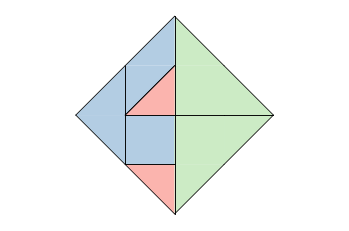

In [41]:
p11 = PIECE('p11', p1_0.piece, couleur=palette[0])
p12 = PIECE('p12', p1_0.piece, couleur=palette[0])
p21 = PIECE('p21', p2_0.piece, couleur=palette[1])
p22 = PIECE('p22', p2_1.piece, couleur=palette[1])
p23 = PIECE('p23', p2_2.piece, couleur=palette[1])
p41 = PIECE('p41', p4_5.piece, couleur=palette[2])
p42 = PIECE('p42', p4_5.piece, couleur=palette[2])

tangram = [p41]
for p in [p11, p12, p21, p22, p23, p42]:
    tangram += p.isometriques()

def rectangleTourne(p,q):
    return 0, p + q - 1, 0, p + q - 1, \
        lambda i, j, k: ( p - 1 < i + j < p + 2 * q - 1 and -p < i - j < p) or \
                        (i + j, k) in [(p - 1, 2), (p + 2 * q - 1, 0)] or \
                        (i - j, k) in [(-p, 3), (p, 1)]

puzzle = PUZZLE(tangram,*rectangleTourne(2,2))
    
s = puzzle.solve()
sol = next(s)
puzzle.plotSolution(sol)


#### Un triabolo d'[ordre](https://fr.wikipedia.org/wiki/Polyabolo#Reconstitution_de_rectangles_avec_un_type_de_polyabolo)  8 et un heptabolo d'ordre 6

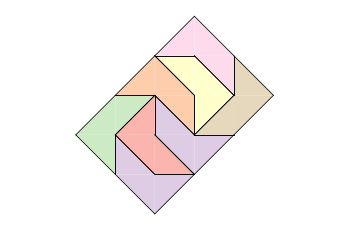

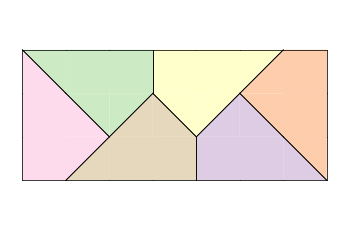

In [45]:
for puzzle in [PUZZLE(p3_3.isometriques(), *rectangleTourne(2,3), strict = False),
               PUZZLE(p7_186.isometriques(), 1,7,1,3, strict = False)]: 
    s = puzzle.solve()
    sol = next(s)
    puzzle.plotSolution(sol)

#### Les 30 pentabolos dans un rectangle

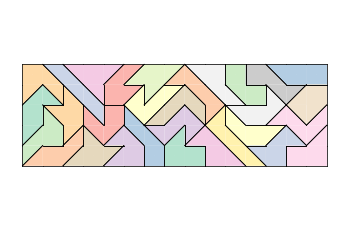

In [76]:
pentabolos = []
for h in polyabolos[5]:
    pentabolos += h.isometriques()

puzzle = PUZZLE(pentabolos,1,15,1,5)
    
s = puzzle.solve()
sol = next(s) # 3 mns
puzzle.plotSolution(sol)
